# Reading files

In [1]:
import pandas as pd
# pandas is a Python package providing fast, flexible, and expressive data 
# structures designed to make working with “relational” or “labeled” data 
# both easy and intuitive. 

### CSV files

In [2]:
!cat data.csv






5;24;0.2

In [3]:
# read file
d = pd.read_csv("data.csv",delimiter=";")
print(d)

   x   y   er
0  1   1  0.2
1  2   4  0.2
2  3   8  0.3
3  4  17  0.4
4  5  24  0.2


In [4]:
# taking values from headers
x=d["x"]
y=d["y"]
e=d["er"]
print(x,y)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64 0     1
1     4
2     8
3    17
4    24
Name: y, dtype: int64


In [5]:
# taking values from colon  .iloc[row,col] or .loc[row,col]
x=d.iloc[:,0]
y=d.iloc[:,1]
e=d.iloc[:,2]
print(x,y)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64 0     1
1     4
2     8
3    17
4    24
Name: y, dtype: int64


### Raw files with headers

In [6]:
# text files
!cat data.txt

In [7]:
# read file
dtext = pd.read_csv("data.txt")
print(dtext)

    x y er
0  1 1 0.2
1  2 4 0.2
2  3 8 0.3


### Raw files without headers

In [8]:
# raw values
!cat data.raw

In [9]:
# read raw file
draw = pd.read_csv("data.raw",delimiter=" ", header = None)
print(draw)

   0  1    2
0  1  1  0.2
1  2  4  0.2
2  3  8  0.3


In [10]:
draw.iloc[:,2]

0    0.2
1    0.2
2    0.3
Name: 2, dtype: float64

### Formatted file

In [11]:
# read raw file
fwidths = [11,10]
dexpe = pd.read_fwf("expe.dat",delimiter=" ",header = None, widths = fwidths)
print(dexpe)

         0         1
0      0.0  0.894520
1    100.0  0.849616
2    200.0  0.806313
3    300.0  0.763861
4    400.0  0.722299
5    500.0  0.681680
6    600.0  0.642211
7    700.0  0.603411
8    800.0  0.565199
9    900.0  0.528873
10  1000.0  0.492817


### More formats
see references 

In [12]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="02_io_readwrite.svg", width=500, height=500)

## Plotting data

In [13]:
import matplotlib.pyplot as plt

In [14]:
# read raw file
fwidths = [11,10]
dexpe = pd.read_fwf("expe.dat",delimiter=" ",header = None, widths = fwidths)
print(dexpe)

         0         1
0      0.0  0.894520
1    100.0  0.849616
2    200.0  0.806313
3    300.0  0.763861
4    400.0  0.722299
5    500.0  0.681680
6    600.0  0.642211
7    700.0  0.603411
8    800.0  0.565199
9    900.0  0.528873
10  1000.0  0.492817


In [15]:
# get x and y
x=dexpe.iloc[:,0]
y=dexpe.iloc[:,1]

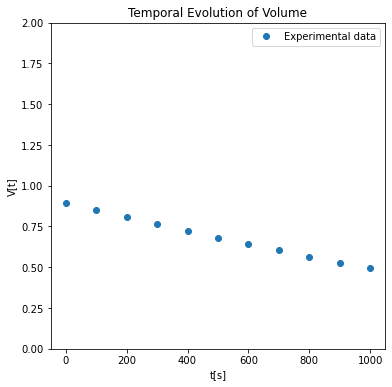

In [16]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y,"o",label="Experimental data")
ax.set_ylim([0,2])
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()

## Fitting : linear

In [17]:
from scipy.optimize import curve_fit
import numpy as np

In [18]:
def func(x, a, b):
    return a * x + b

In [19]:
popt= curve_fit(func, x, y)
print(popt)

(array([-4.01437909e-04,  8.87155318e-01]), array([[ 1.96723961e-11, -9.83619802e-09],
       [-9.83619802e-09,  6.88533863e-06]]))


In [20]:
[a,b]=popt[0]

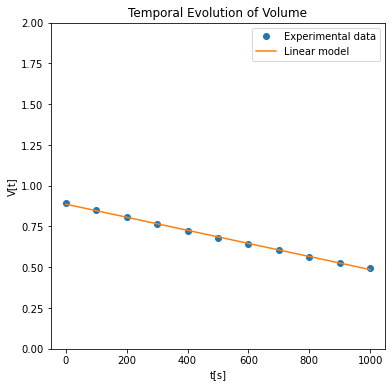

In [21]:
fig = plt.figure(figsize=(6,6)) # 
ax = plt.subplot() 
ax.plot(x,y,"o",label="Experimental data")
ax.plot(x,func(x,*popt[0]),label="Linear model")
ax.set_ylim([0,2])
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()

## Fitting : non linear

In [22]:
# read raw file
fwidths = [6,6,6]
dexpe = pd.read_fwf("power.dat",delimiter=" ",header = None, widths = fwidths)
print(dexpe)

        0      1      2
0   0.102  0.319  0.565
1   0.204  0.452  0.672
2   0.306  0.553  0.744
3   0.408  0.639  0.799
4   0.510  0.714  0.845
5   0.612  0.782  0.885
6   0.714  0.845  0.919
7   0.816  0.904  0.951
8   0.918  0.958  0.979
9   1.020  1.010  1.005
10  1.122  1.059  1.029
11  1.224  1.107  1.052
12  1.327  1.152  1.073
13  1.429  1.195  1.093
14  1.531  1.237  1.112
15  1.633  1.278  1.130
16  1.735  1.317  1.148
17  1.837  1.355  1.164
18  1.939  1.392  1.180
19  2.041  1.429  1.195
20  2.143  1.464  1.210
21  2.245  1.498  1.224
22  2.347  1.532  1.238
23  2.449  1.565  1.251
24  2.551  1.597  1.264
25  2.653  1.629  1.276
26  2.755  1.660  1.288
27  2.857  1.690  1.300
28  2.959  1.720  1.312
29  3.061  1.750  1.323
30  3.163  1.779  1.334
31  3.265  1.807  1.344
32  3.367  1.835  1.355
33  3.469  1.863  1.365
34  3.571  1.890  1.375
35  3.673  1.917  1.384
36  3.776  1.943  1.394
37  3.878  1.969  1.403
38  3.980  1.995  1.412
39  4.082  2.020  1.421
40  4.184  2.045

In [23]:
# get x and y
x =dexpe.iloc[:,0]
y1=dexpe.iloc[:,1]
y2=dexpe.iloc[:,2]

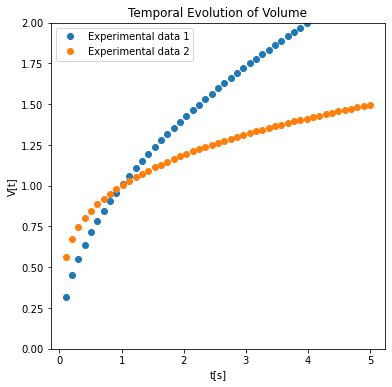

In [24]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y1,"o",label="Experimental data 1")
ax.plot(x,y2,"o",label="Experimental data 2")
ax.set_ylim([0,2])
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()

### log-log

[]

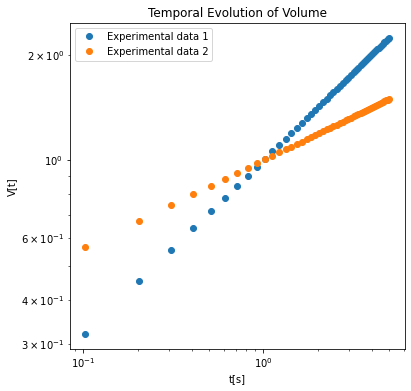

In [25]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y1,"o",label="Experimental data 1")
ax.plot(x,y2,"o",label="Experimental data 2")
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()
ax.loglog()

In [26]:
def func(x, a, b):
    return a * x + b

In [27]:
popt= curve_fit(func, np.log(x), np.log(y1))

In [28]:
popt[0]
a=popt[0][0]
b=popt[0][1]
print("%.3f" % a)
print("%.3f" % b)

0.500
-0.000


[]

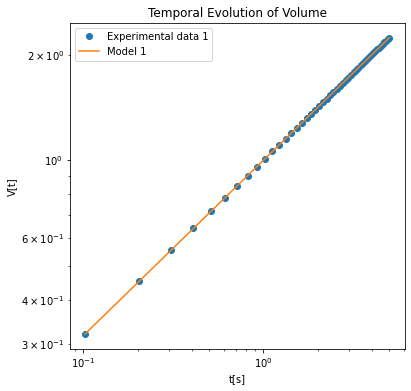

In [29]:
# plot
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.plot(x,y1,"o",label="Experimental data 1")
ax.plot(x,x**a+b,"-",label="Model 1")
ax.set_xlabel("t[s]")
ax.set_ylabel("V[t]")
ax.set_title("Temporal Evolution of Volume")
ax.legend()
ax.loglog()

### Errors bar

In [48]:
# read file
d = pd.read_csv("data.csv",delimiter=";")
# taking values from headers
x=d["x"]
y=d["y"]
e=d["er"]
print(x,y,e)

0    1
1    2
2    3
3    4
4    5
Name: x, dtype: int64 0     1
1     4
2     8
3    17
4    24
Name: y, dtype: int64 0    0.2
1    0.2
2    0.3
3    0.4
4    0.2
Name: er, dtype: float64


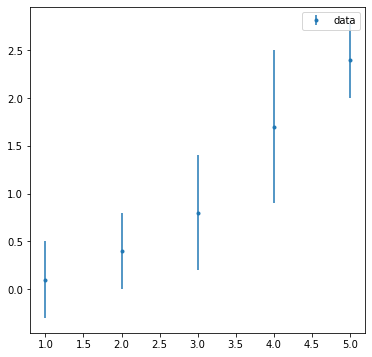

In [31]:
fig = plt.figure(figsize=(6,6)) # s
ax = plt.subplot() 
ax.errorbar(x,0.1*y,e*2, marker='.', linestyle="none", label="data")
ax.legend()

In [97]:
# data generation
x=np.linspace(0,5)
y1 = np.power(x,0.5)
y2 = np.power(x,0.25)
#print(np.size(x))
#for i in range(50):
#    print("%.3f" % x[i],"%.3f" % np.power(x[i],0.5),"%.3f" % np.power(x[i],0.25))
#print(x,np.power(x,1./2))

In [98]:
sx = pd.Series(x)
sy1 = pd.Series(y1)
sy2 = pd.Series(y2)

In [99]:
nd = pd.concat([sx,sy1,sy2],axis=1)

In [100]:
nd.to_csv("test.csv")

In [101]:
d = pd.read_csv("test.csv",delimiter=",")

In [102]:
d

,Unnamed: 0,0,1,2
0,0,0.000000,0.000000,0.000000
1,1,0.102041,0.319438,0.565189
2,2,0.204082,0.451754,0.672126
3,3,0.306122,0.553283,0.743830
4,4,0.408163,0.638877,0.799298
5,5,0.510204,0.714286,0.845154
6,6,0.612245,0.782461,0.884568
7,7,0.714286,0.845154,0.919323
8,8,0.816327,0.903508,0.950530
9,9,0.918367,0.958315,0.978936


,Unnamed: 0,0,1,2
10,10,1.020408,1.010153,1.005063
11,11,1.122449,1.059457,1.029299
12,12,1.224490,1.106567,1.051935
13,13,1.326531,1.151751,1.073197
14,14,1.428571,1.195229,1.093265
15,15,1.530612,1.237179,1.112286
16,16,1.632653,1.277753,1.130377
17,17,1.734694,1.317078,1.147640
18,18,1.836735,1.355262,1.164157
19,19,1.938776,1.392399,1.180000
